In [1]:
import pandas as pd

df_items = pd.read_csv('australian_user_items.csv')
df_items.head()


,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [2]:
import ast

# Asegurarse de que la columna items es una lista de diccionarios
df_items['items'] = df_items['items'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explota la columna items para obtener una fila por juego
df_exploded = df_items.explode('items')

# Extrae item_id y item_name de cada diccionario
df_exploded['item_id'] = df_exploded['items'].apply(lambda d: d.get('item_id') if isinstance(d, dict) else None)
df_exploded['item_name'] = df_exploded['items'].apply(lambda d: d.get('item_name') if isinstance(d, dict) else None)

# Conservamos solo columnas necesarias
df_user_item = df_exploded[['user_id', 'item_id', 'item_name']].dropna()

df_user_item.head()


,user_id,item_id,item_name
0,76561197970982479,10,Counter-Strike
0,76561197970982479,20,Team Fortress Classic
0,76561197970982479,30,Day of Defeat
0,76561197970982479,40,Deathmatch Classic
0,76561197970982479,50,Half-Life: Opposing Force


In [3]:
# Ver cuántos valores nulos hay por columna
nulls = df_user_item.isnull().sum()
print("🔍 Valores nulos por columna:\n", nulls)

# Ver tipos únicos de item_id (¿algún no-numérico?)
print("\n🔍 Tipos únicos de item_id (primeros 10):")
print(df_user_item['item_id'].dropna().unique()[:10])

# ¿Hay usuarios o juegos con ID vacío?
usuarios_vacios = df_user_item['user_id'].isna().sum()
juegos_vacios = df_user_item['item_id'].isna().sum()
print(f"\n❓ Usuarios sin ID: {usuarios_vacios}")
print(f"❓ Juegos sin ID: {juegos_vacios}")


🔍 Valores nulos por columna:
 user_id      0
item_id      0
item_name    0
dtype: int64

🔍 Tipos únicos de item_id (primeros 10):
['10' '20' '30' '40' '50' '60' '70' '130' '300' '240']

❓ Usuarios sin ID: 0
❓ Juegos sin ID: 0


In [4]:
# Revisar duplicados exactos
duplicados = df_user_item.duplicated().sum()
print(f"🔁 Duplicados exactos encontrados: {duplicados}")

# Eliminarlos
df_user_item = df_user_item.drop_duplicates()

print("✅ Duplicados eliminados. Nuevo tamaño del dataset:", df_user_item.shape)


🔁 Duplicados exactos encontrados: 59127
✅ Duplicados eliminados. Nuevo tamaño del dataset: (5094082, 3)


👥 Usuarios únicos: 70912
🎮 Juegos únicos: 10978
🧾 Total interacciones usuario-juego: 5094082


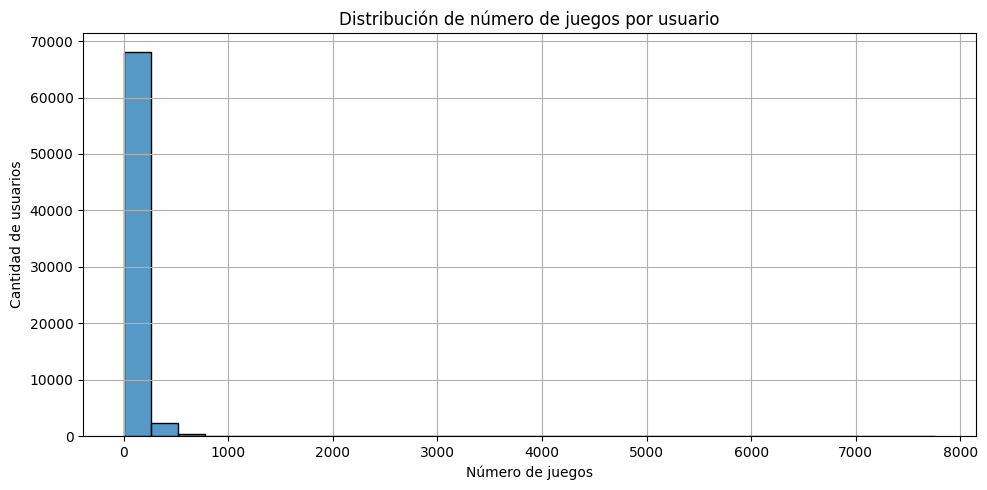


🎯 Top 10 juegos más jugados:
item_name
Dota 2 Test                         49136
Counter-Strike: Global Offensive    43331
Garry's Mod                         42849
Unturned                            38278
Left 4 Dead 2 Beta                  36661
Left 4 Dead 2                       36661
Terraria                            28934
Warframe                            25516
Portal 2                            24206
Counter-Strike: Source              23952
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Juegos únicos y usuarios únicos
n_usuarios = df_user_item['user_id'].nunique()
n_juegos = df_user_item['item_id'].nunique()
n_interacciones = len(df_user_item)

print(f"👥 Usuarios únicos: {n_usuarios}")
print(f"🎮 Juegos únicos: {n_juegos}")
print(f"🧾 Total interacciones usuario-juego: {n_interacciones}")

# Juegos por usuario
juegos_por_usuario = df_user_item.groupby('user_id')['item_id'].count()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(juegos_por_usuario, bins=30, kde=False)
plt.title('Distribución de número de juegos por usuario')
plt.xlabel('Número de juegos')
plt.ylabel('Cantidad de usuarios')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 juegos más frecuentes
top_juegos = df_user_item['item_name'].value_counts().head(10)
print("\n🎯 Top 10 juegos más jugados:")
print(top_juegos)


In [6]:
from scipy.sparse import csr_matrix

# Creamos la matriz binaria usuario x juego si no la tienes aún
df_user_item['valor'] = 1

matriz_binaria = df_user_item.pivot_table(
    index='user_id',
    columns='item_id',
    values='valor',
    fill_value=0
)

print("✅ Matriz usuario x juego creada con shape:", matriz_binaria.shape)

# Creamos matriz dispersa para PCA/KMeans
matriz_sparse = csr_matrix(matriz_binaria.values)


✅ Matriz usuario x juego creada con shape: (70912, 10978)


Entrenando KMeans con k=2...
Entrenando KMeans con k=3...
Entrenando KMeans con k=4...
Entrenando KMeans con k=5...
Entrenando KMeans con k=6...
Entrenando KMeans con k=7...
Entrenando KMeans con k=8...
Entrenando KMeans con k=9...
Entrenando KMeans con k=10...
Entrenando KMeans con k=11...
Entrenando KMeans con k=12...
Entrenando KMeans con k=13...
Entrenando KMeans con k=14...
Entrenando KMeans con k=15...


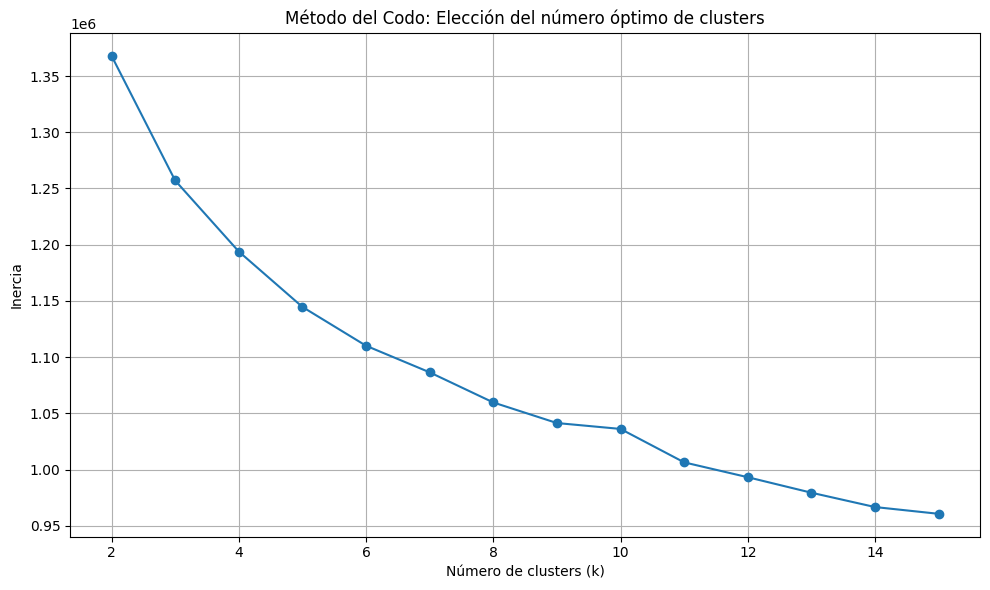

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reducimos dimensionalidad con PCA (para acelerar KMeans)
pca = PCA(n_components=50, random_state=42)
matriz_reducida = pca.fit_transform(matriz_sparse.toarray())

# Probar distintos valores de k
inertias = []
ks = range(2, 16)

for k in ks:
    print(f"Entrenando KMeans con k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(matriz_reducida)
    inertias.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.plot(ks, inertias, marker='o')
plt.title('Método del Codo: Elección del número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Reducimos dimensionalidad con PCA a 50 componentes (ajustable)
pca = PCA(n_components=50, random_state=42)
matriz_reducida = pca.fit_transform(matriz_sparse.toarray())

# Clustering con KMeans (probamos con 5 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(matriz_reducida)

# Guardamos los clusters en un DataFrame
df_clusters = pd.DataFrame({'user_id': matriz_binaria.index, 'cluster': clusters})

print("✅ Clustering completado. Distribución de usuarios por cluster:")
print(df_clusters['cluster'].value_counts())

✅ Clustering completado. Distribución de usuarios por cluster:
cluster
1    41164
0    23019
3     6391
2      338
Name: count, dtype: int64


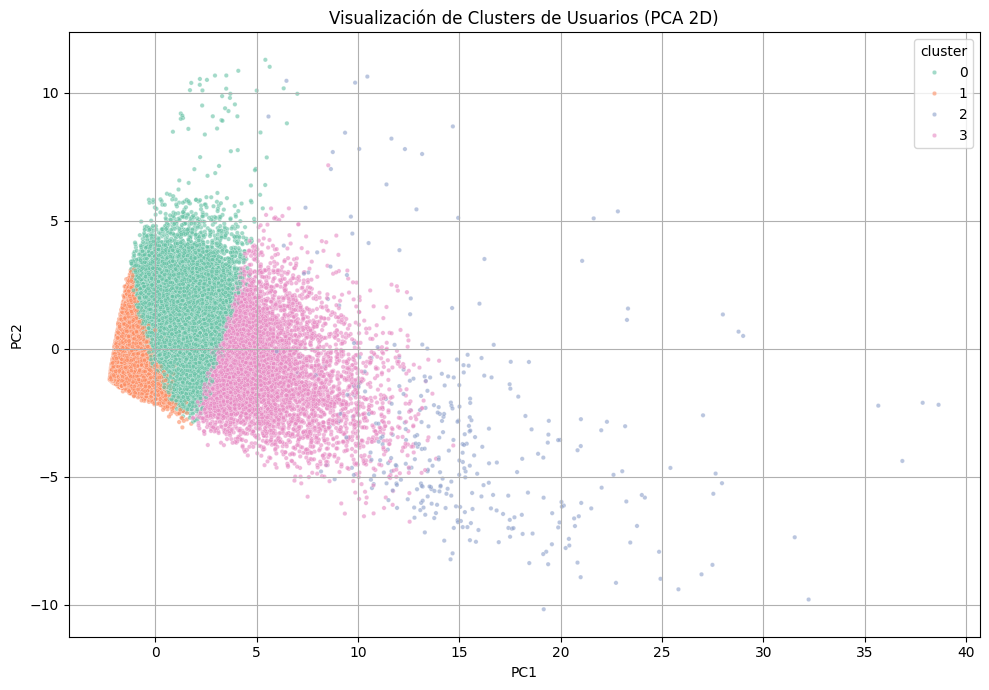

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducimos a 2 dimensiones para visualizar
pca_vis = PCA(n_components=2, random_state=42)
coords_2d = pca_vis.fit_transform(matriz_sparse.toarray())

# Añadimos coordenadas y clusters a un DataFrame
df_vis = pd.DataFrame(coords_2d, columns=['PC1', 'PC2'])
df_vis['cluster'] = clusters

# Gráfico
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='cluster', palette='Set2', s=10, alpha=0.6)
plt.title('Visualización de Clusters de Usuarios (PCA 2D)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Unimos el cluster a cada usuario en el dataset original
df_user_item_clusters = df_user_item.merge(df_clusters, on='user_id')

# Agrupamos por cluster y item_name
juegos_por_cluster = (
    df_user_item_clusters.groupby(['cluster', 'item_name'])
    .size()
    .reset_index(name='count')
)

# Obtenemos el top 10 juegos por cada cluster
top_juegos_por_cluster = (
    juegos_por_cluster
    .sort_values(['cluster', 'count'], ascending=[True, False])
    .groupby('cluster')
    .head(100)
)

# Mostramos resultados
for c in sorted(top_juegos_por_cluster['cluster'].unique()):
    print(f"\n🎯 Top juegos del cluster {c}:")
    juegos = top_juegos_por_cluster[top_juegos_por_cluster['cluster'] == c]
    print(juegos[['item_name', 'count']].to_string(index=False))



🎯 Top juegos del cluster 0:
                                  item_name  count
                                Garry's Mod  20203
           Counter-Strike: Global Offensive  19747
                                Dota 2 Test  18767
                              Left 4 Dead 2  17842
                         Left 4 Dead 2 Beta  17842
                                   Unturned  17596
                                   Terraria  14794
                                   PAYDAY 2  13447
                                   Warframe  12806
                                   Portal 2  12071
                     Counter-Strike: Source  11834
                The Elder Scrolls V: Skyrim  11312
                                  Robocraft  11255
                              Borderlands 2  11142
                               PlanetSide 2  10962
                          Heroes & Generals  10777
                    Half-Life 2: Lost Coast   9815
                                War Thunder   9625
  

In [10]:
# Dataset final: user_id, item_id, item_name, cluster
df_user_item_clustered = df_user_item.merge(df_clusters, on='user_id')

# Guardar como CSV
df_user_item_clustered.to_csv('usuarios_items_cluster.csv', index=False)
print("✅ Dataset con clusters guardado como 'usuarios_items_cluster.csv'")


✅ Dataset con clusters guardado como 'usuarios_items_cluster.csv'
